In [40]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 



In [41]:
data = pd.read_csv('train.csv')
data.head()





,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
data = np.array(data)
m,n = data.shape
np.random.shuffle(data) #to avoid any prepattern , or porder just making ssure 

print(m,n)






42000 785


number of images = m = 42k

we wanted the data in array form 

we  need to separate the label column and make n=764





In [43]:
train_data = data[0:int(0.8*m), :]   #80% of the data is for training

val_data = data[int(0.8*m):m, :]      #20% of the data is for validation

X_train=train_data[:,1:].T       #taking all the rows and all the columns except the first one
Y_train=train_data[:,0]           #taking all the rows and only the first column: puotput

X_val=val_data[:,1:].T
Y_val=val_data[:,0]





In [44]:
print(X_train.shape, Y_train.shape, X_val.shape, Y_val.shape)


(784, 33600) (33600,) (784, 8400) (8400,)


In [45]:
#normalisation of pixel values: 

X_train=X_train/255.0
X_val=X_val/255.0






In [46]:
def  one_hot_converter(Y):
    
    one_hot_Y=np.zeros((Y.size, Y.max()+1))  #33600 x 10 matrix od zeroes 
    one_hot_Y[np.arange(Y.size),Y]=1            #putting one where y occures 
    one_hot_Y=one_hot_Y.T
    return one_hot_Y

one_hot_converter(np.array([0,1,2,3,4,5,6,7,8,9]))





array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [47]:
def initialize_parameters():
  W1 = np.random.rand(10, 784) - 0.5
  B1 = np.random.rand(10, 1) - 0.5
  W2 = np.random.rand(10, 10) - 0.5
  B2 = np.random.rand(10, 1) - 0.5
  return W1, B1, W2, B2

def ReLU(X):
  return np.maximum(X, 0)      #if x is greater than 0 then return x else return 0

def softmax_calculator(Z):
  return np.exp(Z) / sum(np.exp(Z))   

def forward_propagation(W1, B1, W2, B2, X):
  Z1 = W1.dot(X) + B1        #hidden layer 1          
  A1 = ReLU(Z1)             #activation function
  Z2 = W2.dot(A1) + B2      #hidden layer 2
  A2 = softmax_calculator(Z2)   
  return Z1, A1, Z2, A2

def one_hot_converter(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

def backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y):
  one_hot_Y = one_hot_converter(Y)
  dZ2 = A2 - one_hot_Y
  dW2 = 1 / m * dZ2.dot(A1.T)
  dB2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * (Z1 > 0)
  dW1 = 1 / m * dZ1.dot(X.T)
  dB1 = 1 / m * np.sum(dZ1)
  return dW1, dB1, dW2, dB2

def update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, learning_rate):
  W1 = W1 - learning_rate * dW1
  B1 = B1 - learning_rate * dB1
  W2 = W2 - learning_rate * dW2
  B2 = B2 - learning_rate * dB2
  return W1, B1, W2, B2

def get_predictions(A2):
  return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
  W1, B1, W2, B2 = initialize_parameters()

  for i in range(iterations):
    Z1, A1, Z2, A2 = forward_propagation(W1, B1, W2, B2, X)
    dW1, dB1, dW2, dB2 = backward_propagation(W1, B1, W2, B2, Z1, A1, Z2, A2, X, Y)
    W1, B1, W2, B2 = update_parameters(W1, B1, W2, B2, dW1, dB1, dW2, dB2, alpha)

    if (i%20)==0:
      print("Iteration number: ", i)
      print("Accuracy = ", get_accuracy(get_predictions(A2), Y))
  return W1, B1, W2, B2



In [48]:
W1,B1,W2,B2=gradient_descent(X_train,Y_train,0.10,5000)




Iteration number:  0
Accuracy =  0.05601190476190476
Iteration number:  20
Accuracy =  0.38604166666666667
Iteration number:  40
Accuracy =  0.519375
Iteration number:  60
Accuracy =  0.5841964285714286
Iteration number:  80
Accuracy =  0.6279464285714286
Iteration number:  100
Accuracy =  0.6620833333333334
Iteration number:  120
Accuracy =  0.6881547619047619
Iteration number:  140
Accuracy =  0.7094642857142858
Iteration number:  160
Accuracy =  0.7267559523809524
Iteration number:  180
Accuracy =  0.7422619047619048
Iteration number:  200
Accuracy =  0.7552380952380953
Iteration number:  220
Accuracy =  0.7661607142857143
Iteration number:  240
Accuracy =  0.7752678571428572
Iteration number:  260
Accuracy =  0.7830059523809524
Iteration number:  280
Accuracy =  0.7901785714285714
Iteration number:  300
Accuracy =  0.7972023809523809
Iteration number:  320
Accuracy =  0.8030357142857143
Iteration number:  340
Accuracy =  0.8087797619047619
Iteration number:  360
Accuracy =  0.81377

Prediction:  [0]
Actual:  0


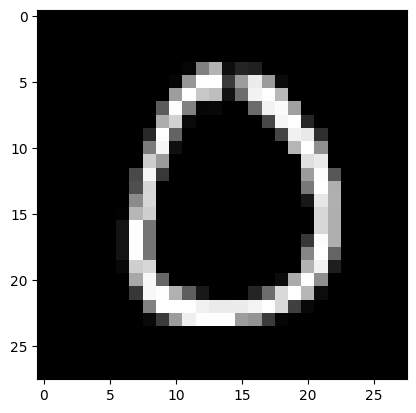

In [49]:
val_data=0

z1_val, a1_val, z2_val, a2_val = forward_propagation(W1, B1, W2, B2, X_val[:, val_data, None])

print("Prediction: ", get_predictions(a2_val))
print("Actual: ", Y_val[val_data])

image_array= X_val[:, val_data].reshape(28, 28)
plt.imshow(image_array, cmap='gray')
plt.show()





In [50]:
z1_val, a1_val, z2_val, a2_val = forward_propagation(W1, B1, W2, B2, X_val)

val_acc=get_accuracy(get_predictions(a2_val), Y_val)
print("Validation accuracy: ", val_acc)


Validation accuracy:  0.9145238095238095
